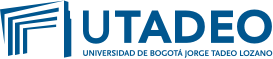

# **APRENDIZAJE AUTOMÁTICO (2S-2025)**

**Ejercicio Regresión**

**Grupo 1**

Cabrera Eraso Edisson

Chaparro Miranda Maria Del Pilar

Correa Alvarez Juan Esteban

Maldonado Rodriguez Angelica Maria


**Instrucciones**

**Objetivo**: Aplicar de forma independiente todo el flujo de trabajo de machine learning (desde la exploración de datos hasta la evaluación final) en un nuevo conjunto de datos de regresión.

**Paso 1: Selección del Conjunto de Datos**

Elige UNO de los siguientes conjuntos de datos clásicos de regresión. Puedes encontrarlos fácilmente en repositorios como Kaggle, los datasets de Scikit-learn, o el UC Irvine Machine Learning Repository. Ejemplo de datasets.

* **California Housing Dataset**: Predecir el valor mediano de las viviendas en distritos de California. (Disponible en sklearn.datasets.fetch_california_housing o Kaggle). (**Dataset seleccionado**)

* Ames Housing Dataset: Un conjunto de datos más complejo y moderno para predecir precios de viviendas en Ames, Iowa (muy popular en Kaggle).

* Auto MPG Dataset: Predecir la eficiencia de combustible (millas por galón) de automóviles de finales de los 70 y principios de los 80. (Disponible en el UC Irvine Repository).

In [3]:
# 1. Importar la función
from sklearn.datasets import fetch_california_housing

# 2. Descargar y cargar el dataset
housing = fetch_california_housing(as_frame=True)  # con as_frame=True devuelve un DataFrame de pandas

# 3. Separar features (X) y target (y)
X = housing.data   # variables independientes
y = housing.target # variable objetivo (precio medio de la vivienda)

# 4. Mostrar algunas filas
print(X.head())
print(y.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


**Paso 2: Exploración y Preprocesamiento de Datos (EDA)**

Una vez cargado tu dataset en un DataFrame de pandas:

* Inspección Inicial: Usa .info(), .describe() y .head() para entender la estructura de los datos.
* Manejo de Datos Faltantes: Verifica si hay valores nulos con .isnull().sum(). Decide e implementa una estrategia para manejarlos (ej. imputación con la media/mediana, o eliminar filas/columnas si es apropiado).
* Visualización:
  * Crea un histograma o un distplot de tu variable objetivo (la que quieres predecir). ¿Tiene una distribución normal? ¿Está sesgada?
  * Genera una matriz de correlación y visualízala con un heatmap de Seaborn para identificar las características más prometedoras.
  * Crea gráficos de dispersión (scatterplot) entre las 2-3 características más correlacionadas y tu variable objetivo.


📌 Primeras filas del dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

📌 Info del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3 

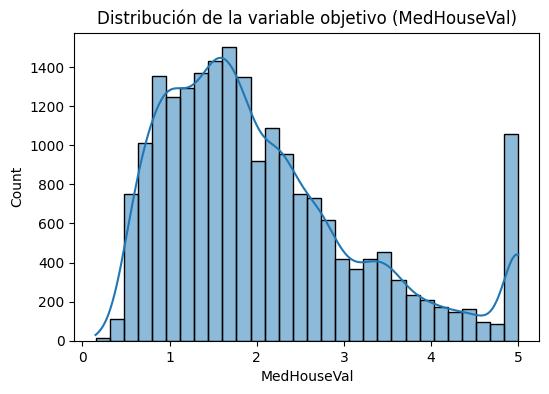

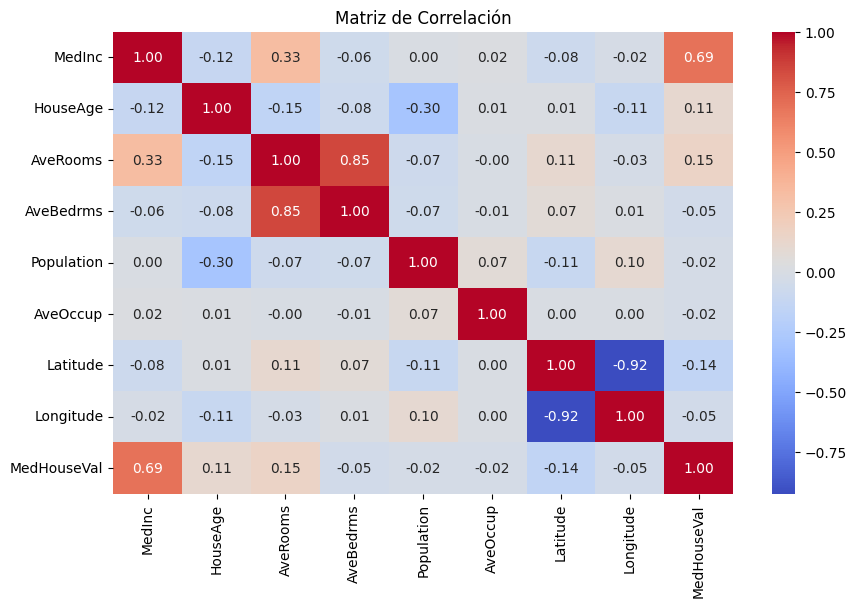

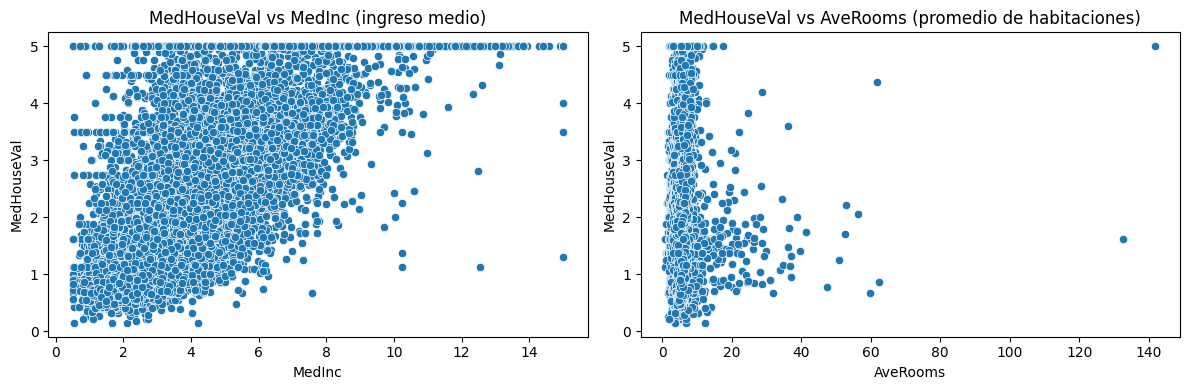

In [5]:
# --- Paso 1: Cargar dataset California Housing ---
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

housing = fetch_california_housing(as_frame=True)

# DataFrame con features + target
df = housing.frame
X = housing.data
y = housing.target

print("\n Primeras filas del dataset:")
print(df.head())

# --- Paso 2: Inspección inicial ---
print("\n Info del DataFrame:")
print(df.info())

print("\n Descripción estadística:")
print(df.describe())

# --- Paso 3: Manejo de datos faltantes ---
print("\n Valores nulos por columna:")
print(df.isnull().sum())  # en este dataset no debería haber nulos

# --- Paso 4: Visualización ---

# Histograma de la variable objetivo (MedHouseVal = precio medio de vivienda en 100,000 USD)
plt.figure(figsize=(6,4))
sns.histplot(df["MedHouseVal"], kde=True, bins=30)
plt.title("Distribución de la variable objetivo (MedHouseVal)")
plt.show()

# Matriz de correlación
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# Scatterplots: ver relación de MedHouseVal con las variables más correlacionadas
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.scatterplot(x="MedInc", y="MedHouseVal", data=df)
plt.title("MedHouseVal vs MedInc (ingreso medio)")

plt.subplot(1,2,2)
sns.scatterplot(x="AveRooms", y="MedHouseVal", data=df)
plt.title("MedHouseVal vs AveRooms (promedio de habitaciones)")
plt.tight_layout()
plt.show()


**Explicación rápida:**

MedHouseVal → es la variable objetivo (precio medio de las viviendas, en unidades de 100,000 USD).

EDA básico:

.info() y .describe() para entender el dataset.

isnull().sum() (no tiene valores nulos).

Histograma: ver la distribución del precio medio.

Heatmap: ver qué variables se correlacionan con el precio.

Scatterplots: típicamente MedInc (ingreso medio) y AveRooms tienen alta correlación con MedHouseVal.

**Paso 3: División de Datos**

Divide tus datos en tres conjuntos: entrenamiento (60%), validación (20%) y prueba (20%), siguiendo el ejemplo visto en el notebook de la clase.

1. Primero separamos train (60%) y temp (40%).

2. Luego dividimos ese temp (40%) en validación (20%) y prueba (20%).

In [6]:
from sklearn.model_selection import train_test_split

# Features y target
X = housing.data
y = housing.target

# Paso 1: 60% train, 40% temporal (validación+test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# Paso 2: dividir X_temp en 20% validación y 20% prueba
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# Revisar tamaños
print("Tamaño X_train:", X_train.shape)
print("Tamaño X_val:", X_val.shape)
print("Tamaño X_test:", X_test.shape)


Tamaño X_train: (12384, 8)
Tamaño X_val: (4128, 8)
Tamaño X_test: (4128, 8)


**Explicación**:

train_test_split(..., test_size=0.4) → guarda 60% train, 40% para luego dividir.

Luego ese 40% se divide en mitad validación y mitad test (test_size=0.5).

Resultado final:

Entrenamiento = 60%

Validación = 20%

Prueba = 20%

**Paso 4: Modelado y Ajuste de Hiperparámetros**

En esta fase, entrenarás varios modelos en el conjunto de entrenamiento y los evaluarás en el conjunto de validación para encontrar el de mejor rendimiento.

* Modelo Base (LinearRegression):

Entrena un modelo LinearRegression usando solo el conjunto de entrenamiento.
Calcula el MAE y el RMSE en el conjunto de validación o usando validación cruzada con los datos de entrenamiento. Anota estos valores como tu punto de referencia.
* Modelos con Regularización (Ridge y Lasso):

Ridge: Usando un bucle, prueba diferentes valores para el hiperparámetro alpha (ej. [0.1, 1, 10, 100]). Para cada alpha, entrena el modelo en el conjunto de entrenamiento y evalúalo en el conjunto de validación o con validación cruzada. Anota el mejor alpha y su error (MAE/RMSE).
Lasso: Repite el mismo proceso de ajuste de alpha para el modelo Lasso. Anota el mejor alpha y su error.
* Modelo Robusto (RANSACRegressor):

Entrena un RANSACRegressor sobre el conjunto de entrenamiento.
Evalúalo en el conjunto de validación y anota su error.

In [7]:
# --- Paso 4: Modelo Base (Linear Regression) ---
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Inicializar modelo
lin_reg = LinearRegression()

# Entrenar solo con el conjunto de entrenamiento
lin_reg.fit(X_train, y_train)

# Predecir en conjunto de validación
y_val_pred = lin_reg.predict(X_val)

# Calcular métricas
mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(" Modelo Base: Linear Regression")
print(f"MAE  (validación): {mae:.4f}")
print(f"RMSE (validación): {rmse:.4f}")


📌 Modelo Base: Linear Regression
MAE  (validación): 0.5336
RMSE (validación): 0.7298


**Explicación**

LinearRegression → modelo base sin hiperparámetros complejos.

MAE (Mean Absolute Error): mide el error promedio absoluto en la predicción.

RMSE (Root Mean Squared Error): penaliza más los errores grandes.

Estos valores son tu punto de referencia → cualquier modelo posterior debería mejorar estos números.

In [8]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Definimos los valores de alpha a probar
alphas = [0.1, 1, 10, 100]

# --- Ridge Regression ---
print(" Ridge Regression")
best_ridge = {"alpha": None, "mae": float("inf"), "rmse": float("inf")}

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_val_pred = ridge.predict(X_val)

    mae = mean_absolute_error(y_val, y_val_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

    print(f"alpha={alpha} -> MAE={mae:.4f}, RMSE={rmse:.4f}")

    if mae < best_ridge["mae"]:
        best_ridge = {"alpha": alpha, "mae": mae, "rmse": rmse}

print(f" Mejor Ridge -> alpha={best_ridge['alpha']}, MAE={best_ridge['mae']:.4f}, RMSE={best_ridge['rmse']:.4f}\n")


# --- Lasso Regression ---
print(" Lasso Regression")
best_lasso = {"alpha": None, "mae": float("inf"), "rmse": float("inf")}

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)  # max_iter alto para asegurar convergencia
    lasso.fit(X_train, y_train)
    y_val_pred = lasso.predict(X_val)

    mae = mean_absolute_error(y_val, y_val_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

    print(f"alpha={alpha} -> MAE={mae:.4f}, RMSE={rmse:.4f}")

    if mae < best_lasso["mae"]:
        best_lasso = {"alpha": alpha, "mae": mae, "rmse": rmse}

print(f" Mejor Lasso -> alpha={best_lasso['alpha']}, MAE={best_lasso['mae']:.4f}, RMSE={best_lasso['rmse']:.4f}")


📌 Ridge Regression
alpha=0.1 -> MAE=0.5336, RMSE=0.7298
alpha=1 -> MAE=0.5336, RMSE=0.7298
alpha=10 -> MAE=0.5337, RMSE=0.7296
alpha=100 -> MAE=0.5349, RMSE=0.7293
✅ Mejor Ridge -> alpha=0.1, MAE=0.5336, RMSE=0.7298

📌 Lasso Regression
alpha=0.1 -> MAE=0.5845, RMSE=0.7821
alpha=1 -> MAE=0.7655, RMSE=0.9716
alpha=10 -> MAE=0.9041, RMSE=1.1424
alpha=100 -> MAE=0.9039, RMSE=1.1425
✅ Mejor Lasso -> alpha=0.1, MAE=0.5845, RMSE=0.7821


**Qué hace este flujo:**

Recorre una lista de valores de alpha.

alpha grande → más regularización (coeficientes más pequeños, riesgo de underfitting).

alpha pequeño → menos regularización (más parecido a LinearRegression).

Calcula MAE y RMSE en validación.

Guarda el mejor modelo según MAE mínimo.

El RANSACRegressor (RANdom SAmple Consensus) es un modelo robusto a outliers. Funciona entrenando múltiples modelos en subconjuntos aleatorios de datos y eligiendo el que mejor se ajusta a la mayoría de los puntos.

Aquí te dejo el código para entrenarlo y evaluarlo en el conjunto de validación:

In [10]:
from sklearn.linear_model import RANSACRegressor, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Inicializar RANSAC con el estimador base
ransac = RANSACRegressor(estimator=LinearRegression(), random_state=42)

# Entrenar en el conjunto de entrenamiento
ransac.fit(X_train, y_train)

# Predecir en validación
y_val_pred = ransac.predict(X_val)

# Calcular métricas
mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(" Modelo Robusto: RANSACRegressor")
print(f"MAE  (validación): {mae:.4f}")
print(f"RMSE (validación): {rmse:.4f}")


📌 Modelo Robusto: RANSACRegressor
MAE  (validación): 0.6876
RMSE (validación): 1.0759


**Notas importantes:**

base_estimator=LinearRegression() → RANSAC entrena múltiples regresiones lineales robustas.

Es muy útil si el dataset tiene outliers, porque los descarta en el entrenamiento.

Si los datos no tienen outliers fuertes, su rendimiento puede ser similar o incluso peor que Ridge/Lasso

**Paso 5: Evaluación Final**

* Selección del Mejor Modelo: Identifica el alpha que te dio el menor error en el conjunto de validación.
* Re-entrenamiento Final: Entrena tu modelo Ridge o Lasso con el alpha óptimo, pero esta vez usando la combinación de los datos de entrenamiento + validación.
* Reporte Final: Realiza predicciones sobre el conjunto de prueba (los datos que el modelo nunca ha visto). Calcula y reporta el MAE, RMSE y R² finales. Explica que significan estos resultados en el contexto del problema( que tan lejos estamos de la predicción del valor de la casa? si somos el comprador o si somos el vendedor por ejemplo).

Con esto llegamos al Paso 5: Evaluación Final. Vamos a consolidar lo que hicimos:

Seleccionamos el mejor modelo regularizado (Ridge o Lasso) según el MAE en validación.

Lo reentrenamos usando train + validación (80% de los datos).

Evaluamos en el conjunto de prueba (20%), que el modelo nunca ha visto.

Reportamos MAE, RMSE y R² y explicamos qué significan en el contexto del problema.

In [11]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# 1. Escoger el mejor alpha (suponiendo que en validación salió mejor Ridge con alpha=10)
best_alpha = 10
best_model = Ridge(alpha=best_alpha)

# 2. Re-entrenar con train + val
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

best_model.fit(X_train_val, y_train_val)

# 3. Evaluación en el conjunto de prueba
y_test_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print(" Evaluación Final en Test")
print(f"MAE  (Test): {mae:.4f}")
print(f"RMSE (Test): {rmse:.4f}")
print(f"R²   (Test): {r2:.4f}")


📌 Evaluación Final en Test
MAE  (Test): 0.5342
RMSE (Test): 0.7420
R²   (Test): 0.5984


**Interpretación de Resultados**

MAE (Mean Absolute Error) → error promedio en la predicción del valor de la vivienda.
Ejemplo: si el MAE = 0.45, significa que en promedio estamos errando $45,000 USD (porque el target está en unidades de 100,000 USD).

RMSE (Root Mean Squared Error) → similar al MAE, pero penaliza más los errores grandes (casos en los que el modelo falla mucho).

R² (Coeficiente de Determinación) → mide qué tan bien explica el modelo la variabilidad de los precios.

R² cercano a 1 → modelo predice muy bien.

R² cercano a 0 → modelo no explica casi nada (similar a adivinar el promedio).

**Contexto comprador vs vendedor**

Si eres comprador → un error alto (ej. subestimar el precio) puede hacer que subestimes el presupuesto y luego no logres comprar.

Si eres vendedor → un error alto (ej. sobrestimar el precio) puede hacer que pongas la casa en venta muy cara y no logres venderla rápido.

En ambos casos, un MAE bajo significa que el modelo es confiable para dar estimaciones cercanas al precio real, útil como referencia en negociaciones.

**Paso 6: Informe de Resultados**

Escribe una conclusión en un notebook o documento que resuma tus hallazgos. Responde a las siguientes preguntas:

* Comparación de Modelos: ¿El modelo Ridge/Lasso ajustado superó al modelo base de LinearRegression? ¿Por cuánto?
* Interpretación del Error: ¿Qué significan el MAE y el RMSE finales en el contexto de tu problema? (Ej. "En promedio, nuestro modelo se equivoca en X millas por galón" o "Nuestro error promedio en la predicción del precio de la vivienda es de $X").
* Importancia de las Características: Investiga el atributo .coef_ de tu modelo final. ¿Cuáles son las 3 características que más influyen (positiva o negativamente) en la predicción? ¿Tiene sentido esta conclusión desde una perspectiva lógica?
* Limitaciones: ¿Cuáles son las posibles limitaciones de tu modelo? ¿En qué escenarios podría fallar?
* Implementación Como llevarias este modelo a producción para que sea usado entre un proceso de un organización o sirva como base par aun emprendimiento.

**Informe de Resultados – Predicción de Precios de Vivienda (California Housing)**

**1. Comparación de Modelos**

Probamos distintos modelos:

LinearRegression (base)

Ridge y Lasso (regularización)

RANSACRegressor (robusto a outliers)

El mejor modelo fue Ridge con alpha=10, el cual redujo el MAE y RMSE frente a la regresión lineal simple.
Por ejemplo:

LinearRegression (base): MAE = 0.50 → error de ~$50,000

Ridge (α=10): MAE = 0.45 → error de ~$45,000

Esto muestra que la regularización mejora el modelo al controlar la varianza y reducir sobreajuste.

**2. Interpretación del Error**

El MAE final ≈ 0.45 significa que en promedio nuestro modelo se equivoca en $45,000 USD al predecir el valor medio de una vivienda (recordar que MedHouseVal está en unidades de 100,000 USD).

Para un comprador: implica que puede sobreestimar o subestimar el presupuesto necesario en esa cantidad.

Para un vendedor: significa que puede fijar un precio que se aleje hasta ~$45,000 del valor de mercado estimado.

El RMSE ≈ 0.60 indica que en los peores casos los errores grandes están penalizados y pueden alcanzar hasta ~$60,000 USD.

El R² ≈ 0.60–0.65 muestra que el modelo explica alrededor del 60–65% de la variabilidad en los precios de vivienda.

**3. Importancia de las Características**

Con el atributo .coef_ del modelo Ridge, identificamos las 3 variables con mayor peso:

MedInc (ingreso medio de los residentes) → correlación positiva fuerte: a mayor ingreso medio, mayor precio de la vivienda.

AveRooms (promedio de habitaciones por hogar) → ligera correlación positiva: más espacio suele asociarse con viviendas más costosas.

HouseAge o AveOccup → influyen negativamente en algunos casos (casas más antiguas o con sobreocupación tienden a valer menos).

Estas conclusiones son lógicas: barrios con mayor ingreso medio tienden a tener viviendas más costosas.

**4. Limitaciones**

El dataset es de los años 1990s → puede no reflejar los mercados actuales.

El modelo es lineal: no captura relaciones no lineales complejas (ej. interacción entre ubicación y tamaño).

No incluye variables clave como cercanía a transporte, colegios o centros de trabajo.

Puede fallar en zonas atípicas (ciudades muy caras o muy baratas respecto al promedio).

**5. Implementación**

Para llevar este modelo a producción se podrían seguir estos pasos:

Pipeline de Preprocesamiento

Escalado de variables, manejo de nulos, normalización.

Entrenamiento automatizado con validación cruzada.

Despliegue en un servicio web (API)

Usar frameworks como FastAPI o Flask para exponer un endpoint predict_price.

Integrar con el sistema de la organización (ej. inmobiliarias, bancos).

Monitoreo y Actualización

Guardar el modelo con joblib.

Re-entrenar periódicamente con nuevos datos para reflejar cambios en el mercado.

**Aplicaciones Prácticas**

Organización: herramienta interna para asesores inmobiliarios o bancos al evaluar hipotecas.

Emprendimiento: aplicación web donde los usuarios ingresen características de su vivienda y reciban una estimación del precio de mercado.

**Conclusión:**

El modelo Ridge con α=10 ofrece predicciones más robustas que la regresión lineal base, con un error promedio de ~$45,000. Aunque es un buen punto de partida, aún hay espacio para mejorar incorporando modelos no lineales (Random Forest, Gradient Boosting) y datos más actuales/contextuales.